<a href="https://colab.research.google.com/github/luthandonx/Python/blob/main/PreSeg_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Preprocessing 

#Imports
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np


img = cv.imread(cv.samples.findFile("/content/010obverse-th.png"),cv.IMREAD_GRAYSCALE)
img2 = cv.imread(cv.samples.findFile("/content/010reverse.jpg"))
cv2_imshow(img)
cv2_imshow(img2)


Notes on Edge detection
You can easily notice that in an edge, the pixel intensity changes in a notorious way. A good way to express changes is by using derivatives. A high change in gradient indicates a major change in the image

About the sobel Function
1)The Sobel Operator is a discrete differentiation operator. It computes an approximation of the gradient of an image intensity function.
2)The Sobel Operator combines Gaussian smoothing and differentiation

When the size of the kernel is 3, the Sobel kernel shown above may produce noticeable inaccuracies (after all, Sobel is only an approximation of the derivative). OpenCV addresses this inaccuracy for kernels of size 3 by using the Scharr() function. This is as fast but more accurate than the standard Sobel function. It implements the following kernels

Remove noise by blurring with a Gaussian filter ( kernel size = 3 )
    

In [ ]:
#We can add some Guassian Smoothing inorder to remove noise
img = cv.imread(cv.samples.findFile("/content/010obverse-th.png"))
cv2_imshow(img)
plt.title("Original")
plt.imshow(img)
#Edge detection
image = cv.imread(cv.samples.findFile("/content/010obverse-th.png"),cv.IMREAD_GRAYSCALE)
print(image.shape)
h,w = image.shape
# Sobel Edges
x_sobel = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3) #We can try with kernal size 3 and 5
y_sobel = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
plt.figure(figsize=(20, 20))


#Smoothing
img2 = cv.GaussianBlur(image, (3, 3), 0,cv.BORDER_DEFAULT)
plt.subplot(3, 2, 1)
plt.title("Smoothing")
plt.imshow(img2)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)

sobel_or = cv.bitwise_or(x_sobel, y_sobel)
plt.subplot(3, 2, 4)
plt.imshow(sobel_or)

laplacian = cv.Laplacian(image, cv.CV_64F)
plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

#testing the threshold if the gradient is bigger that V2 then it's is an edge
# if gradient is smaller that v1 not an edge

canny = cv.Canny(image, 50, 120)
plt.subplot(3, 2, 6)
plt.imshow(canny)

**Dilation, Opening, Closing And Erosion**

These are used to removing noises, finding an intensity hole or bump in an image and many more

In [ ]:
#Dilation, Opening, Closing And Erosion
image = cv.imread(cv.samples.findFile("/content/010obverse-th.png"))

image = canny 

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
kernel = np.ones((3,3), np.uint8)

#Erosion We do not want to perform erosion 
erosion = cv.erode(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Erosion")
plt.imshow(erosion)

#Dialation
dilation = cv.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 2)
plt.title("Dilation")
plt.imshow(dilation)

#Opening
opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)

#Closing
closing = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

Adaptive Thresholding
In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it.

In [ ]:
#Thresholding, Adaptive Thresholding
image = cv.imread(cv.samples.findFile("/content/010obverse-th.png"),0)
cv2_imshow(image)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
Meanthresh = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,5,3)
plt.subplot(3, 2, 2)
plt.title("Adaptive Mean Thresholding")
plt.imshow(Meanthresh)
Gausthresh = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,5, 3)
plt.subplot(3, 2, 3)
plt.title("Adaptive Guassian Thresholding")
plt.imshow(Gausthresh)


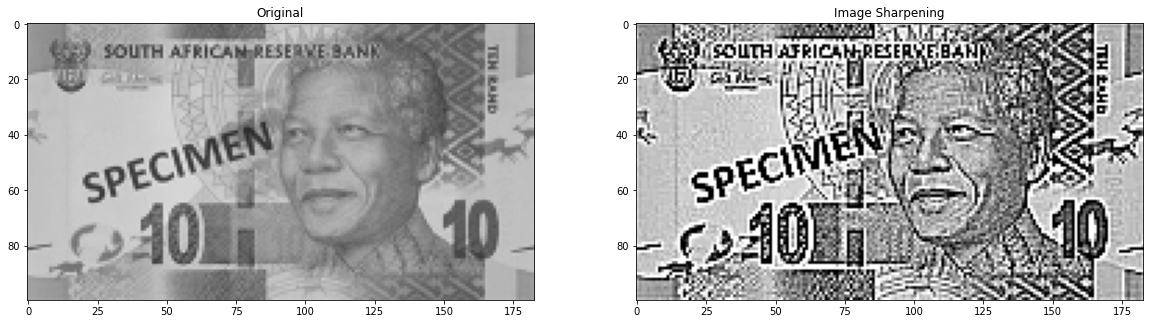

In [ ]:
#Sharpening
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])
sharpened = cv.filter2D(image, -1, kernel_sharpening)
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)
plt.show()

Count of Contours  = 66


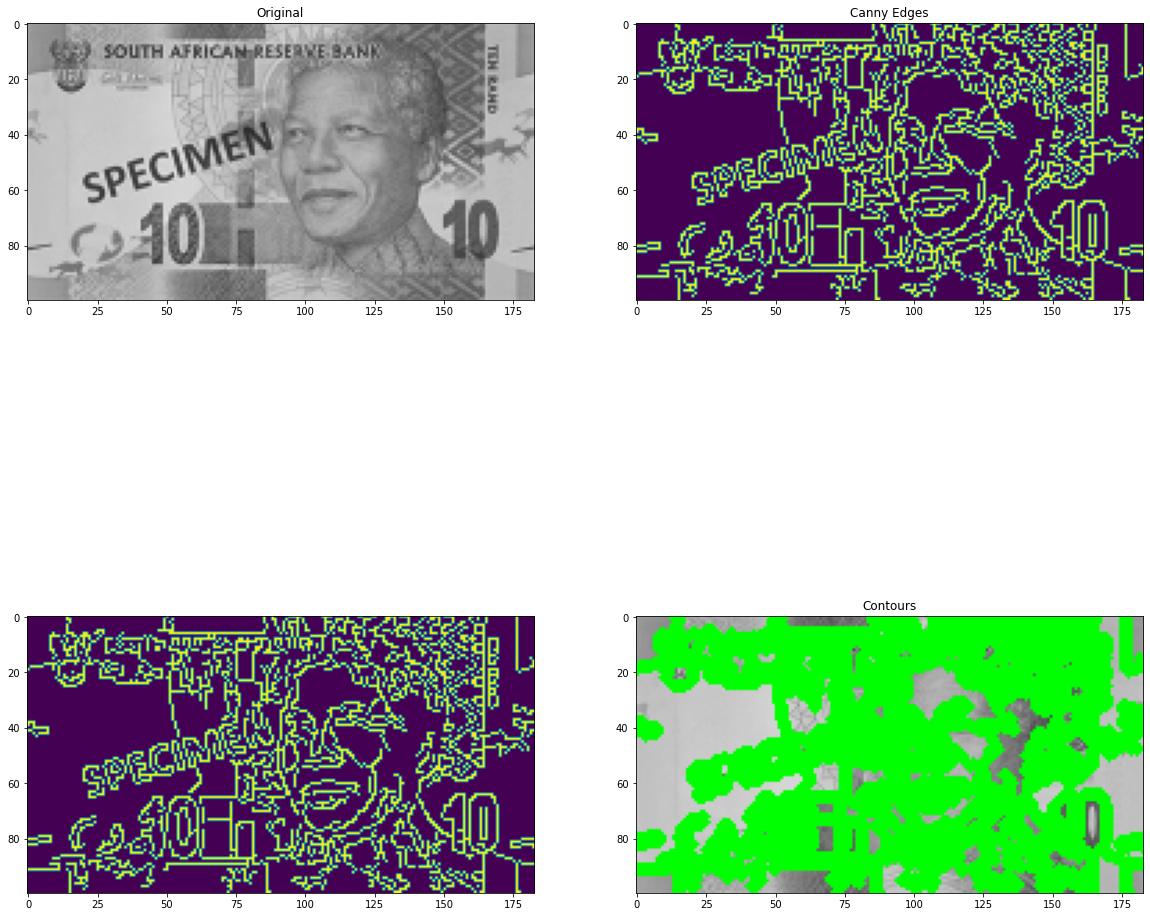

In [ ]:
#Contours
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
# Grayscale
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
# Canny edges
edged = cv.Canny(gray, 30, 200)
plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)
# Finding Contours
contour, hier = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
plt.subplot(2, 2, 3)
plt.imshow(edged)
print("Count of Contours  = " + str(len(contour)))
# All contours
cv.drawContours(image, contour, -1, (0,255,0), 3)
plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

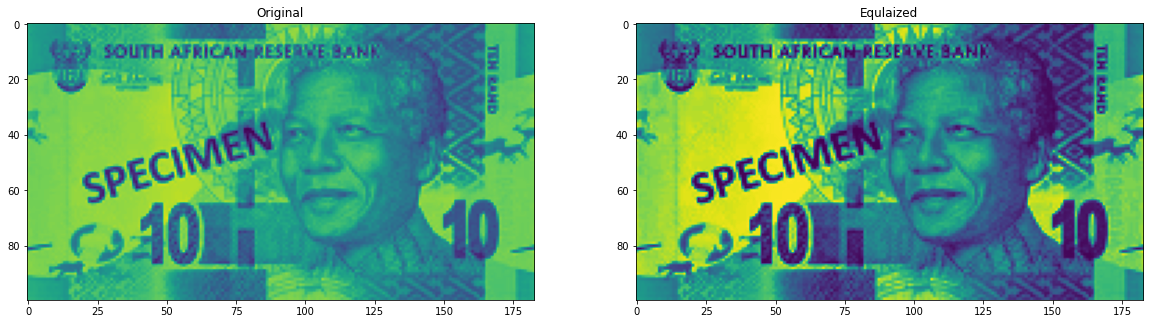

In [ ]:
#Histogram Equalization


image = cv.imread(cv.samples.findFile("/content/010obverse-th.png"),0)
dst = cv.equalizeHist(image)
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.title("Equlaized")
plt.imshow(dst)